In [1]:
import statsmodels as tsa 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pymc3 as pm 
import arviz as az


%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


Text(0, 0.5, 'y')

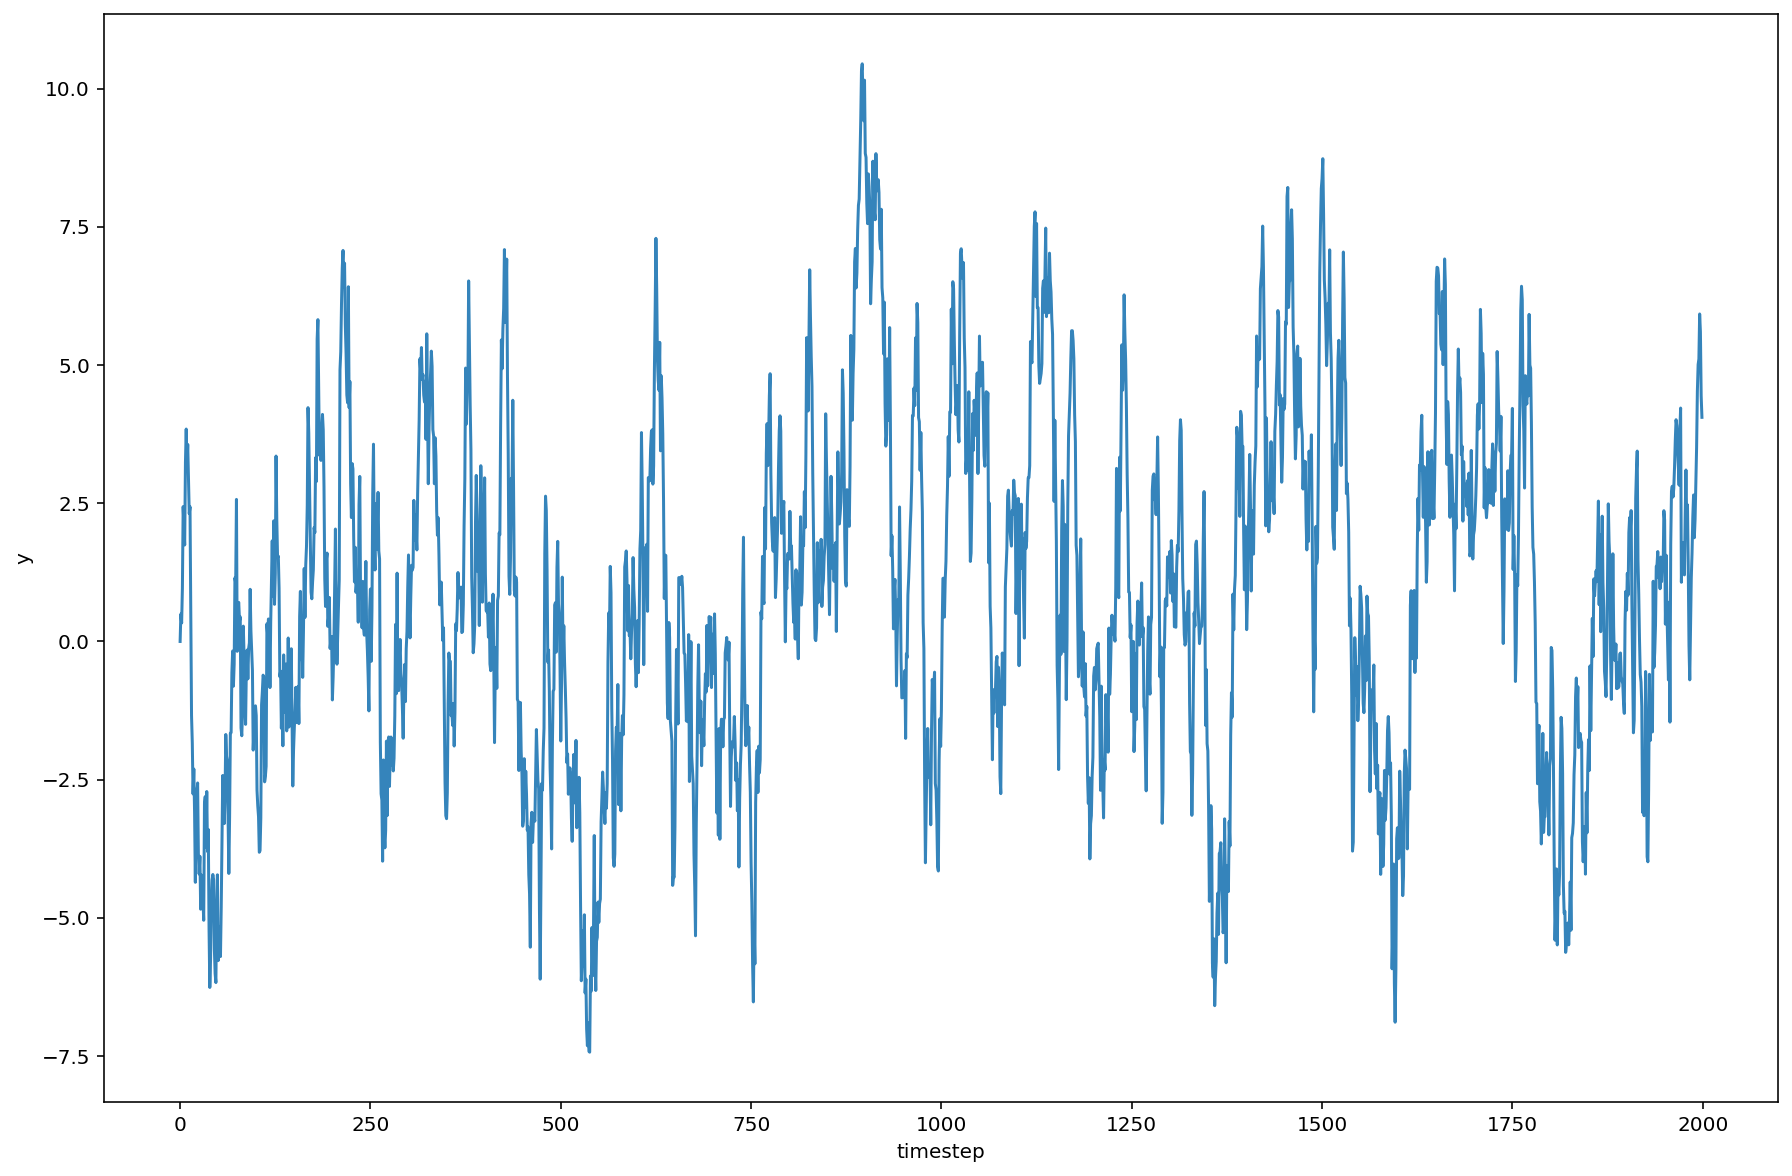

In [2]:
#simulation 

n_timesteps = 20000

y = np.zeros((n_timesteps,))

true_theta = 0.95 
variance = 1.0 

true_mean = 0.0 #stationary process 

for t in range(1, n_timesteps):
    y[t] = true_theta*y[t-1] + np.random.normal(true_mean, variance)


y = y[:2000]
plt.figure(figsize=(15, 10))
plt.plot(y, alpha=.9, label='timeseries')
plt.xlabel("timestep")
plt.ylabel("y")

In [3]:
with pm.Model() as model:

    theta = pm.Normal("theta", 0.0, 1.0)
    variance = pm.Normal("tau", 0.0, 1.0)

    mean = pm.Normal("mean", 0.0, 1.0)

    likelihood = pm.AR1("y", k=theta, tau_e=variance, observed=y-mean)

    trace = pm.sample(4000, tune=4000, random_seed=RANDOM_SEED)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mean, tau, theta]


Sampling 2 chains for 4_000 tune and 4_000 draw iterations (8_000 + 8_000 draws total) took 13 seconds.


<Figure size 504x504 with 0 Axes>

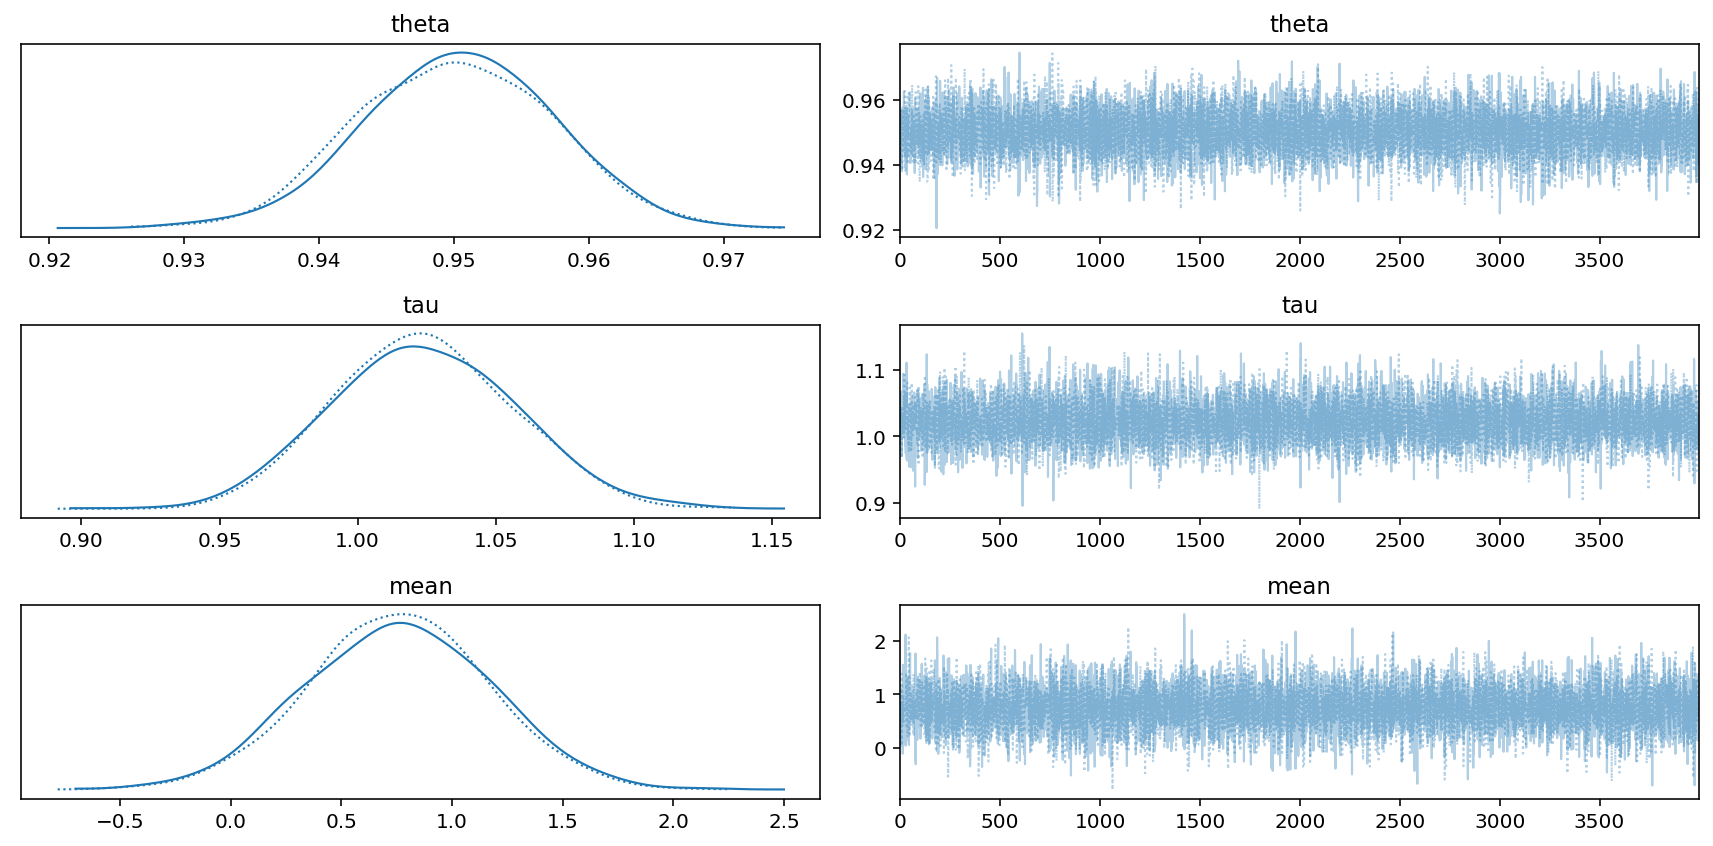

In [4]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

Text(0, 0.5, 'y')

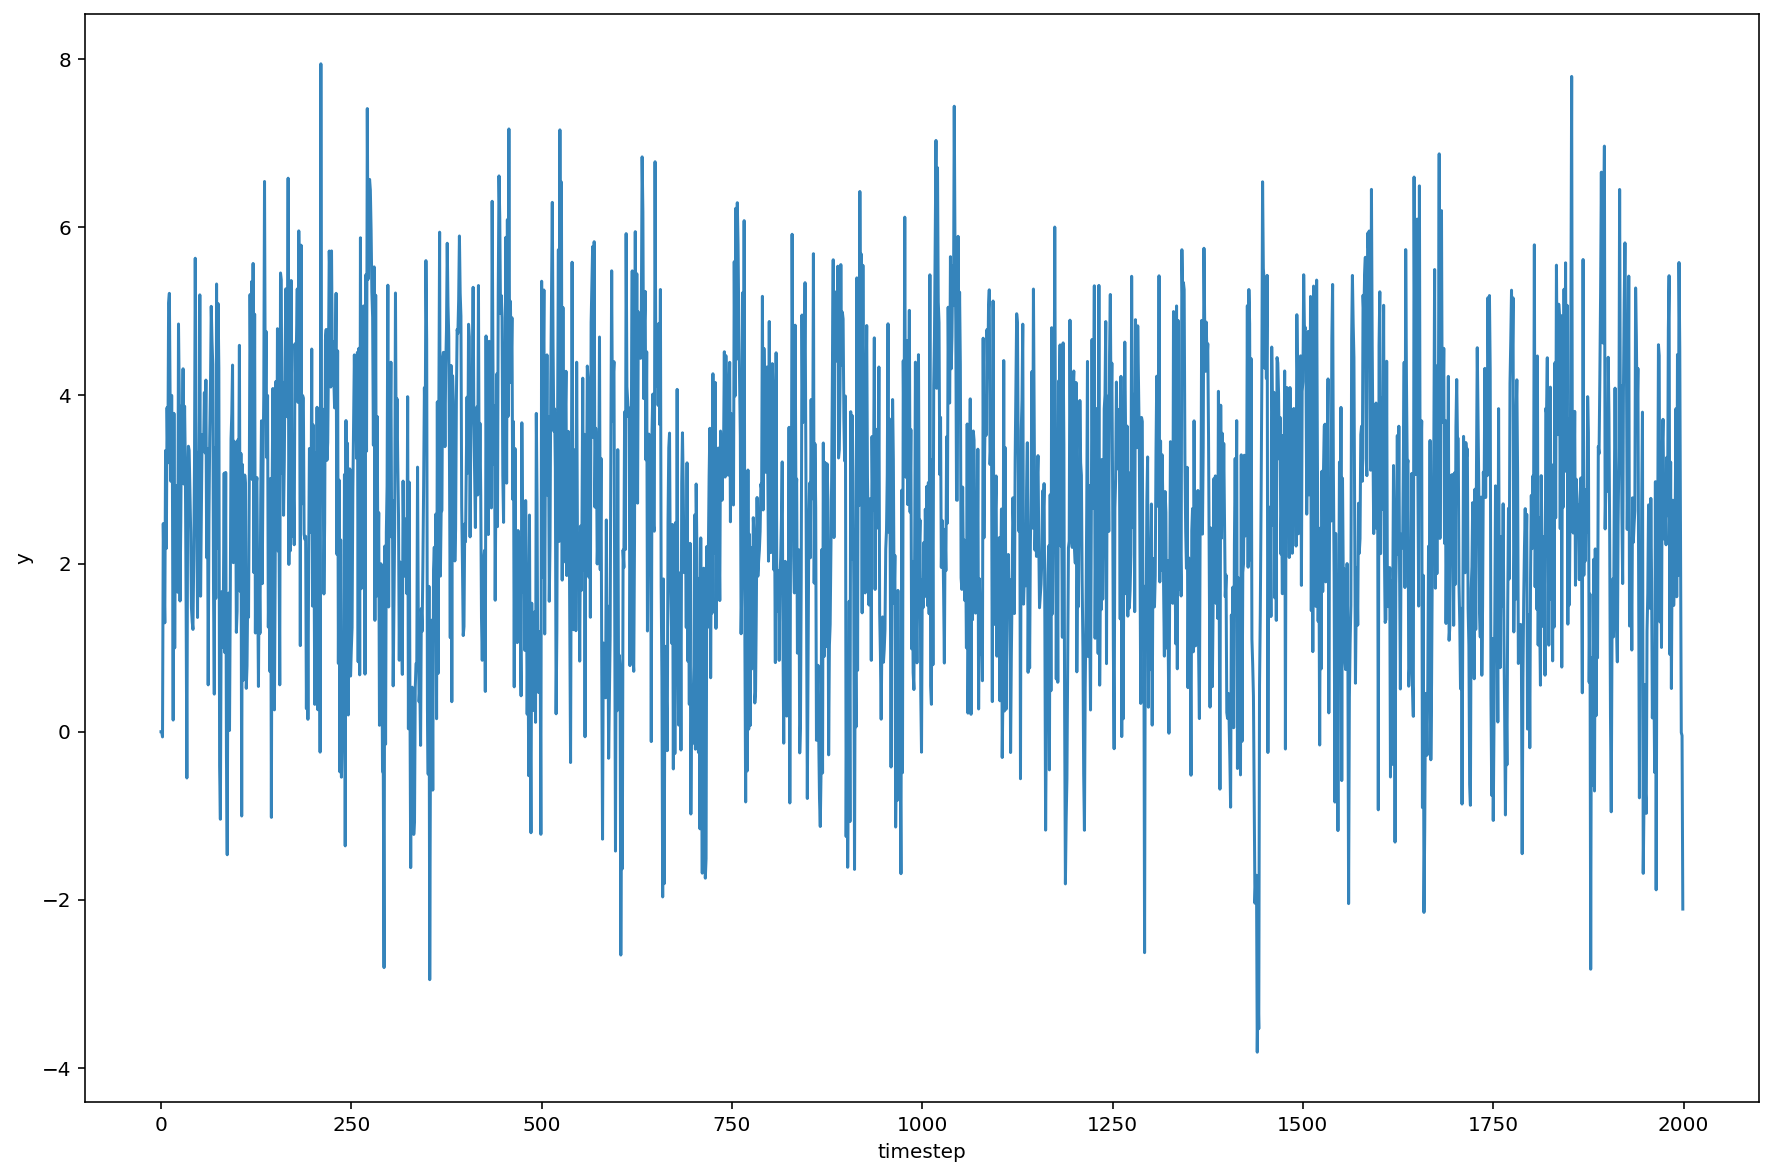

In [5]:
#more complex model
n_timesteps = 20000

y2 = np.zeros((n_timesteps,))

true_theta = 0.3
true_theta2 = 0.3
variance = 1.5 

true_mean = 1.0 #stationary process 

for t in range(2, n_timesteps):
    y2[t] = true_theta*y2[t-1] + true_theta2*y2[t-2] + np.random.normal(true_mean, variance)


y2 = y2[:2000]
plt.figure(figsize=(15, 10))
plt.plot(y2, alpha=.9, label='timeseries')
plt.xlabel("timestep")
plt.ylabel("y")

In [6]:
with pm.Model() as model2:

    theta = pm.Beta("theta", alpha=2.0, beta=5.0, shape=2)
    tau = pm.Uniform("tau", 0.0,2.0)

    likelihood = pm.AR("y", theta, sigma=tau, observed=y2)

    trace2 = pm.sample(10000, tune=12000, target_accept=.9, init='advi+adapt_diag', random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 10700
Interrupted at 10,699 [5%]: Average Loss = 4,300.8
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau, theta]


Sampling 2 chains for 12_000 tune and 10_000 draw iterations (24_000 + 20_000 draws total) took 43 seconds.


<Figure size 504x504 with 0 Axes>

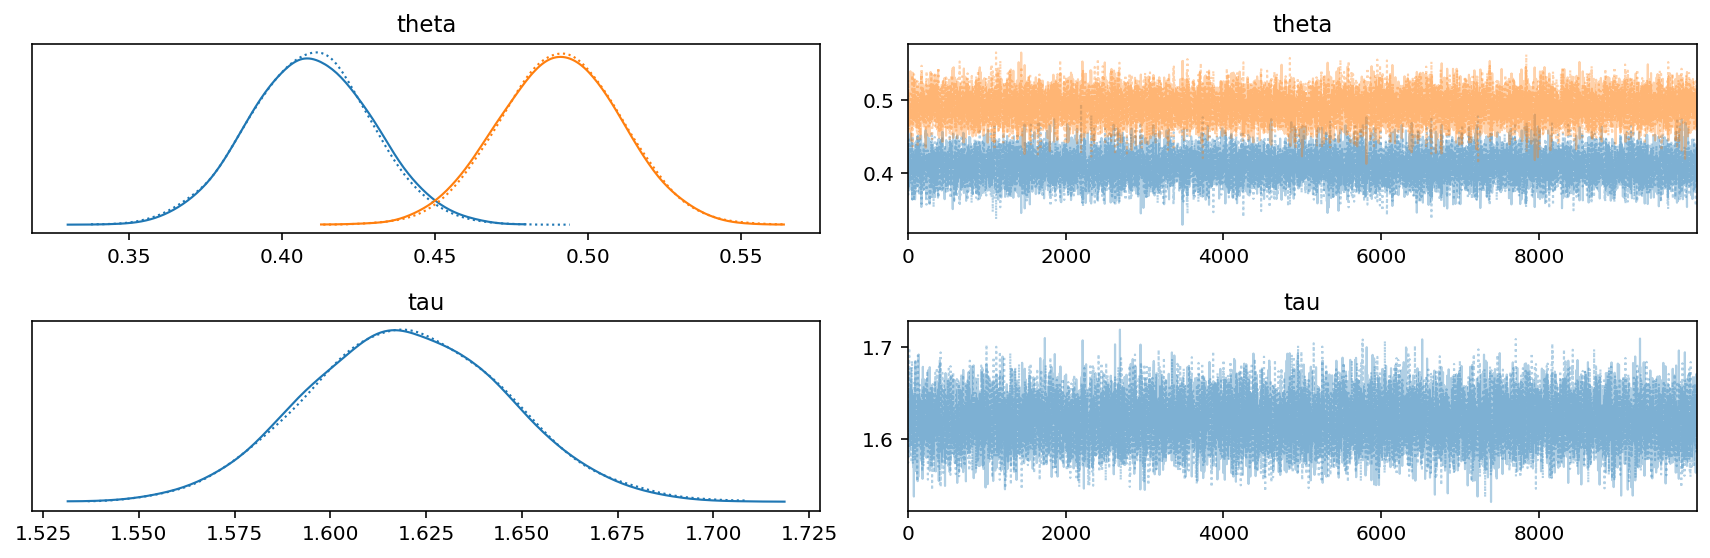

In [7]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace2)
plt.tight_layout();